In [ ]:
import tensorflow as tf

In [ ]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 11s 0us/step


In [ ]:
X_train.shape

(50000, 32, 32, 3)

array([[[154, 177, 187],
        [126, 137, 136],
        [105, 104,  95],
        ...,
        [ 91,  95,  71],
        [ 87,  90,  71],
        [ 79,  81,  70]],

       [[140, 160, 169],
        [145, 153, 154],
        [125, 125, 118],
        ...,
        [ 96,  99,  78],
        [ 77,  80,  62],
        [ 71,  73,  61]],

       [[140, 155, 164],
        [139, 146, 149],
        [115, 115, 112],
        ...,
        [ 79,  82,  64],
        [ 68,  70,  55],
        [ 67,  69,  55]],

       ...,

       [[175, 167, 166],
        [156, 154, 160],
        [154, 160, 170],
        ...,
        [ 42,  34,  36],
        [ 61,  53,  57],
        [ 93,  83,  91]],

       [[165, 154, 128],
        [156, 152, 130],
        [159, 161, 142],
        ...,
        [103,  93,  96],
        [123, 114, 120],
        [131, 121, 131]],

       [[163, 148, 120],
        [158, 148, 122],
        [163, 156, 133],
        ...,
        [143, 133, 139],
        [143, 134, 142],
        [143, 133, 144]]], dtype=uint8)
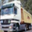

In [ ]:
X_train[1]

In [ ]:
X_test.shape

(10000, 32, 32, 3)

array([[[158, 112,  49],
        [159, 111,  47],
        [165, 116,  51],
        ...,
        [137,  95,  36],
        [126,  91,  36],
        [116,  85,  33]],

       [[152, 112,  51],
        [151, 110,  40],
        [159, 114,  45],
        ...,
        [136,  95,  31],
        [125,  91,  32],
        [119,  88,  34]],

       [[151, 110,  47],
        [151, 109,  33],
        [158, 111,  36],
        ...,
        [139,  98,  34],
        [130,  95,  34],
        [120,  89,  33]],

       ...,

       [[ 68, 124, 177],
        [ 42, 100, 148],
        [ 31,  88, 137],
        ...,
        [ 38,  97, 146],
        [ 13,  64, 108],
        [ 40,  85, 127]],

       [[ 61, 116, 168],
        [ 49, 102, 148],
        [ 35,  85, 132],
        ...,
        [ 26,  82, 130],
        [ 29,  82, 126],
        [ 20,  64, 107]],

       [[ 54, 107, 160],
        [ 56, 105, 149],
        [ 45,  89, 132],
        ...,
        [ 24,  77, 124],
        [ 34,  84, 129],
        [ 21,  67, 110]]], dtype=uint8)
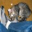

In [ ]:
X_test[0]

In [ ]:
X_train[0].max()

255

In [ ]:
X_train = X_train/255.0
X_test = X_test/255.0

In [ ]:
X_train[0].max()

1.0

In [ ]:
import numpy as np
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
y_train_enc = tf.keras.utils.to_categorical(y_train)
y_test_enc = tf.keras.utils.to_categorical(y_test)

In [ ]:
X_train.shape

(50000, 32, 32, 3)

## Modeling

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(8, strides=1, input_shape=(32,32,3), kernel_size=5))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Conv2D(16, strides=1,kernel_size=5))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(120))
model.add(tf.keras.layers.Dense(84))
model.add(tf.keras.layers.Dense(10, activation="softmax"))




In [ ]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 8)         608       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 8)         0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        3216      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 16)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense (Dense)               (None, 120)               4

In [ ]:
model.fit(X_train, y_train_enc, epochs=5, validation_split=0.2)

Epoch 1/5
1250/1250 [==============================] - 11s 5ms/step - loss: 1.5943 - accuracy: 0.4307 - val_loss: 1.4492 - val_accuracy: 0.4890
Epoch 2/5
1250/1250 [==============================] - 6s 5ms/step - loss: 1.3720 - accuracy: 0.5152 - val_loss: 1.3304 - val_accuracy: 0.5376
Epoch 3/5
1250/1250 [==============================] - 5s 4ms/step - loss: 1.2911 - accuracy: 0.5486 - val_loss: 1.3402 - val_accuracy: 0.5380
Epoch 4/5
1250/1250 [==============================] - 6s 5ms/step - loss: 1.2549 - accuracy: 0.5609 - val_loss: 1.3108 - val_accuracy: 0.5490
Epoch 5/5
1250/1250 [==============================] - 6s 5ms/step - loss: 1.2316 - accuracy: 0.5692 - val_loss: 1.2724 - val_accuracy: 0.5631


In [ ]:
pred = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [ ]:
y_pred = pred.argmax(axis=1)

In [ ]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
# Importing Evaluation matrces
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

Accuracy :  0.5631
--------------------------------------------------
F1 :  [0.59990641 0.70779531 0.43965517 0.41077441 0.47991194 0.44551282
 0.64760915 0.61945231 0.66361789 0.61814231]
--------------------------------------------------
Reacll :  [0.641 0.74  0.408 0.488 0.436 0.417 0.623 0.656 0.653 0.569]
--------------------------------------------------
Precision :  [0.56376429 0.67827681 0.47663551 0.35465116 0.53365973 0.47821101
 0.67424242 0.58676208 0.67458678 0.67657551]
--------------------------------------------------
Confusion Matrix....
 [[641  42  50  38  20   8  13  14 133  41]
 [ 49 740   9  17  16   9  20  16  48  76]
 [ 97   9 408 135  97  87  63  69  17  18]
 [ 36  24  72 488  62 153  64  64  11  26]
 [ 42  19 109 137 436  46  69 126  12   4]
 [ 21   5  67 282  43 417  34 104   9  18]
 [ 13  17  65 139  46  33 623  35  12  17]
 [ 37   6  39  78  56  86  12 656   2  28]
 [139  54  21  35  24  14   9   7 653  44]
 [ 62 175  16  27  17  19  17  27  71 569]]
-------

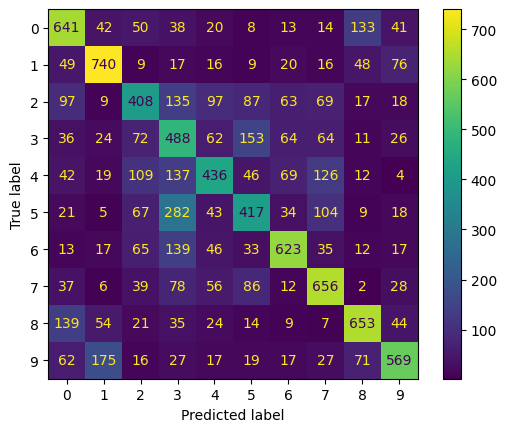

In [ ]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)

# Precision
precision = precision_score(y_test, y_pred, average=None)

# Recall
recall = recall_score(y_test, y_pred, average=None)

# F1 Score
f1_sco = f1_score(y_test, y_pred, average=None)

# Confusion Matrix
confusion_mat = confusion_matrix(y_test, y_pred)

# Report
report = classification_report(y_test, y_pred)

print('Accuracy : ', accuracy)
print("-"*50)
print('F1 : ', f1_sco)
print("-"*50)
print('Reacll : ', recall)
print("-"*50)
print('Precision : ', precision)
print("-"*50)
print('Confusion Matrix....\n', confusion_mat)
print("-"*50)
print('Classification Report....\n', report)
print("-"*50)
print('Plotting Confusion Matrix...\n')
disp = ConfusionMatrixDisplay(confusion_mat, display_labels=None)
disp.plot()
plt.show()